# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [1]:
%%capture
pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [2]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [3]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

## Exploratory Data Analysis
### Basic Statistics

In [4]:
# EDA 1: Basic Stats
# Define a function to print basic stats

def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    print(f'{name} has {df.duplicated().sum()} duplicated rows')
    
dfs = [denver, neighborhoods, census]
names = ['denver', 'neighborhoods', 'census']

for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<denver>--------

----------------------------------------------------
denver has 78 rows
denver has 9 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB
None

----------------------------------------------------
         StoreNumber                            Name   PhoneNumber  \
count             78                              78            77   
un

### Visualization

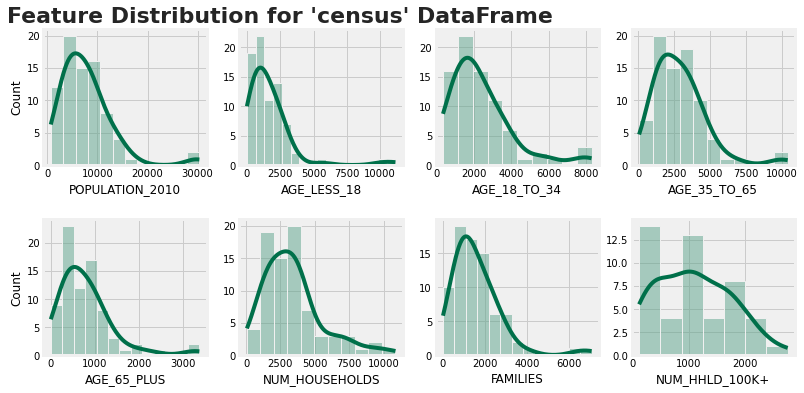

In [5]:
# Visualization 1: Distribution 
# Check distribution for these 8 columns in census
# 'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'

i = 2
j = 4
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(i, j, figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)
#plt.suptitle("Feature Distribution for 'census' DataFrame", fontsize=16, weight='bold')
axs[0][0].text(-8000, 22, "Feature Distribution for 'census' DataFrame", fontsize=22, weight='bold',color='#252525');

r, c = 0, 0
cols = census.columns
idx = 2
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(census[cols[idx]], ax=axs[r][c], kde=True, lw=1, color='#5CA48B')
        axs[r][c].lines[0].set_color('#00704A')
        axs[r][c].set_xlabel(cols[idx], fontsize=12)
        if c != 0:
            axs[r][c].set_ylabel("")
        c += 1
        idx += 1
    r += 1
    c = 0

# 2. Data Imputation 
### denver
* 'PhoneNumber', 'Street1', 'Street2', 'Street3', 'PostalCode' --> Delete columns
* 'StoreNumber', 'Name', 'Longitude', 'Latitude' columns have no missing values
* Some values in 'Name' have leading space --> Remove a space and check duplicates

### neighborhoods
* neighborhoods dataframe has no missing values  

### census
'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'
* 'NUM_HHLD_100K+' has 30 missing values

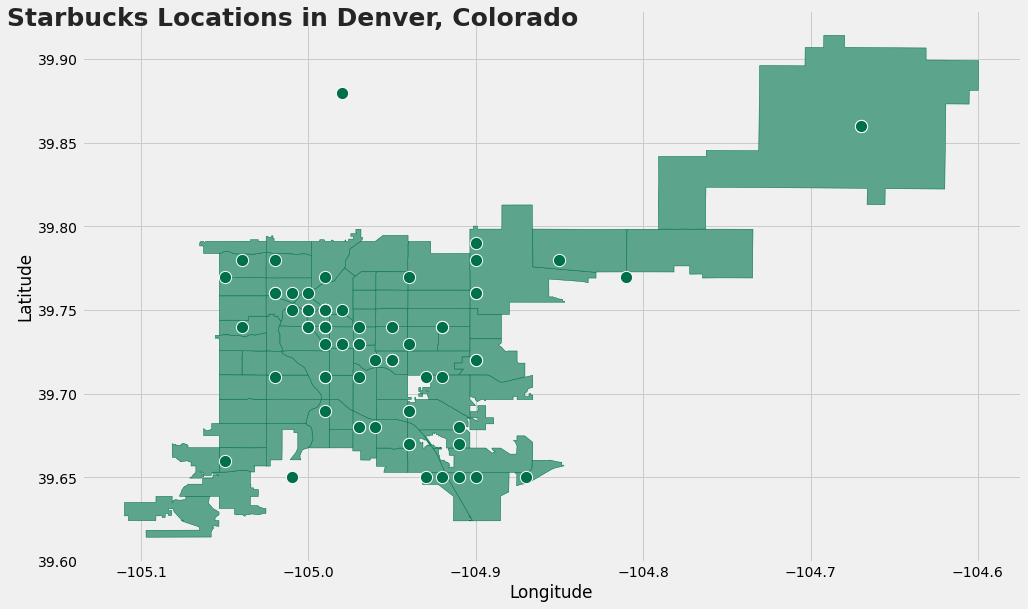

In [6]:
# Visualization 2: Denver Map and Sturbucks Locations
# Draw Denver Colorado map
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))
denver_map = neighborhoods.plot(ax=ax, color='#5CA48B', edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=150);
ax.text(-105.18, 39.92, "Starbucks Locations in Denver, Colorado", fontsize=25, weight='bold', color='#252525');

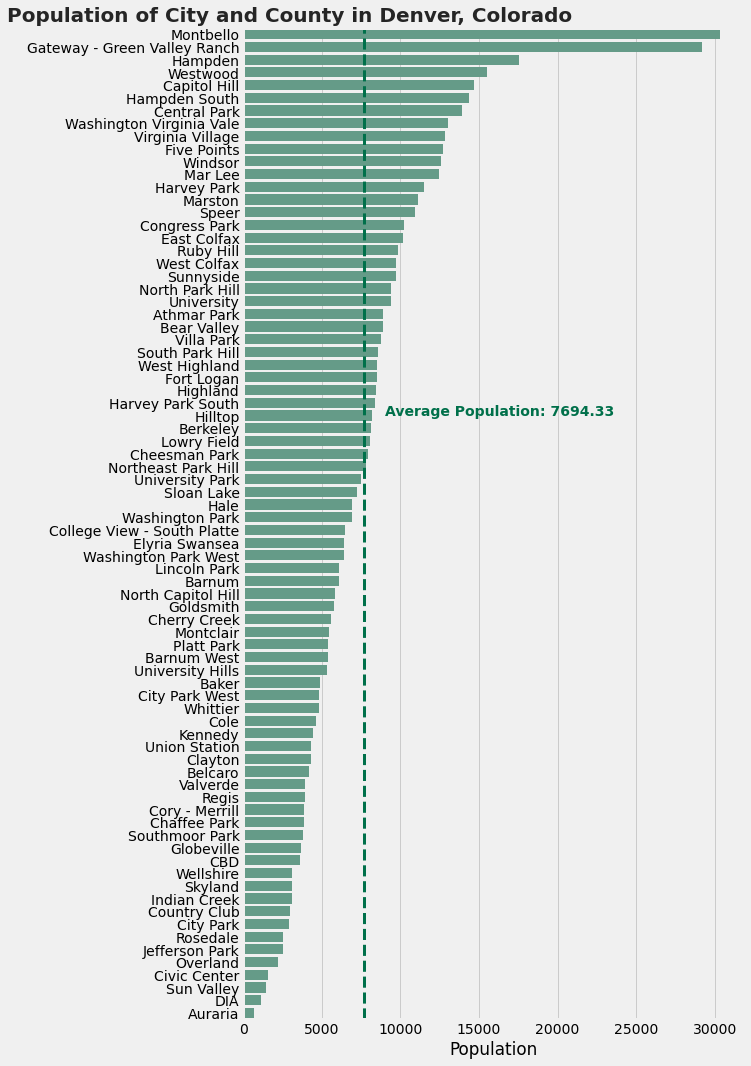

In [7]:
# Visualization 3: Population Barplot
# 'POPULATION_2010'
# Sort 'POPULATION_2010' by descending
census_sorted = census.sort_values('POPULATION_2010', ascending=False)

# Get an average population
avg_population = census_sorted['POPULATION_2010'].mean()

# Draw barplot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 17))

sns.barplot(census_sorted['POPULATION_2010'], census_sorted['NBHD_NAME'], ax=ax, color='#5CA48B')
ax.axvline(avg_population, lw=3, ls='--', c='#00704A')
ax.set_xlabel("Population")
ax.set_ylabel("")
#avg_population = mpatches.Patch(color='darkviolet', label='Average Population')
ax.text(-15000, -1, "Population of City and County in Denver, Colorado", fontsize=20, weight='bold', color='#252525');
avg_text = f"Average Population: {avg_population:.2f}"
ax.text(9000, 30, avg_text, fontsize=14, weight='bold', color='#00704A');
# ax.legend(handles=[avg_population]);

# Challenge
* Boxplot shows that several city/county has outliers in population of 'AGE_18_TO_34'

In [8]:
# Check outliers
# Function to retrun lower and upper outliers
def get_outliers(my_array):
    percentile_3rd = np.percentile(my_array , 75)   # 3rd percentile 
    percentile_1st = np.percentile(my_array , 25)   # 1st percentile
    IQR = percentile_3rd - percentile_1st           # IQR
    lower_outliers = percentile_1st - IQR * 1.5 
    upper_outliers = percentile_3rd + IQR * 1.5
    return (lower_outliers, upper_outliers)

# Get outliers of 'Age 18 to 34' city/county
_, upper_outliers = get_outliers(census['AGE_18_TO_34'])
print(f"Population greater than {upper_outliers} is outliers")

# Get 'NBHD_NAME' and 'AGE_18_TO_34' for 'upper_outliers'
outlier_city = census[census['AGE_18_TO_34'] > upper_outliers].loc[:, ['NBHD_NAME', 'AGE_18_TO_34']]
# Sort outlier_city by descending order of 'AGE_18_TO_34'
outlier_city.sort_values('AGE_18_TO_34', ascending=False)

Population greater than 5765.375 is outliers


,NBHD_NAME,AGE_18_TO_34
8,Capitol Hill,8274.0
27,Gateway - Green Valley Ranch,7778.0
44,Montbello,7742.0
25,Five Points,5961.0
63,University,5784.0


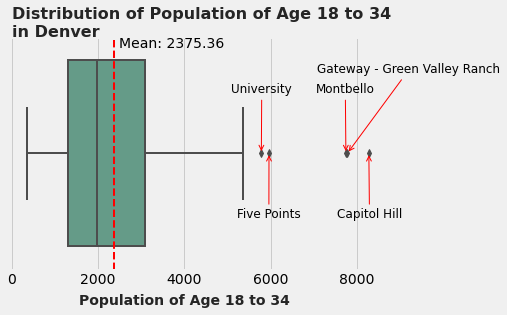

In [40]:
# Visualization 3
# Boxplot 'AGE_18_TO_34'

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))

# Draw boxplot
sns.boxplot(census['AGE_18_TO_34'], ax=ax, color='#5CA48B', linewidth=2)
# Draw a virtical line representing the average of 'AGE_18_TO_34'
avg_18_34_population = census['AGE_18_TO_34'].mean()
ax.axvline(avg_18_34_population, color='red', ls='--', lw=2)
ax.annotate(f"Mean: {avg_18_34_population:.2f}", xy=(avg_18_34_population+100, -0.45))

#Add axis label and title
ax.set_xlabel("")
ax.text(0, -0.5, "Distribution of Population of Age 18 to 34\nin Denver", 
        fontsize=16, weight='bold', color='#252525')
ax.text(4000, 0.65, "Population of Age 18 to 34", 
        color='#252525', fontsize=14, weight='bold', ha='center')

# Add outliers city/area names      
for i in range(len(outlier_city)):
        if outlier_city.iloc[i, 0] == "University":
                h, v = -30, 60
        elif outlier_city.iloc[i, 0] == 'Capitol Hill':
                h, v = -32, -65
        elif outlier_city.iloc[i, 0] == 'Gateway - Green Valley Ranch':
                h, v = -30, 80
        elif outlier_city.iloc[i, 0] == 'Montbello':
                h, v = -30, 60
        else:
                h, v = -32, -65
        ax.annotate(outlier_city.iloc[i, 0], xy=(outlier_city.iloc[i, 1], 0), 
                    xytext=(h, v),
                    arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":1}, 
                    textcoords="offset points",
                    fontsize=12);

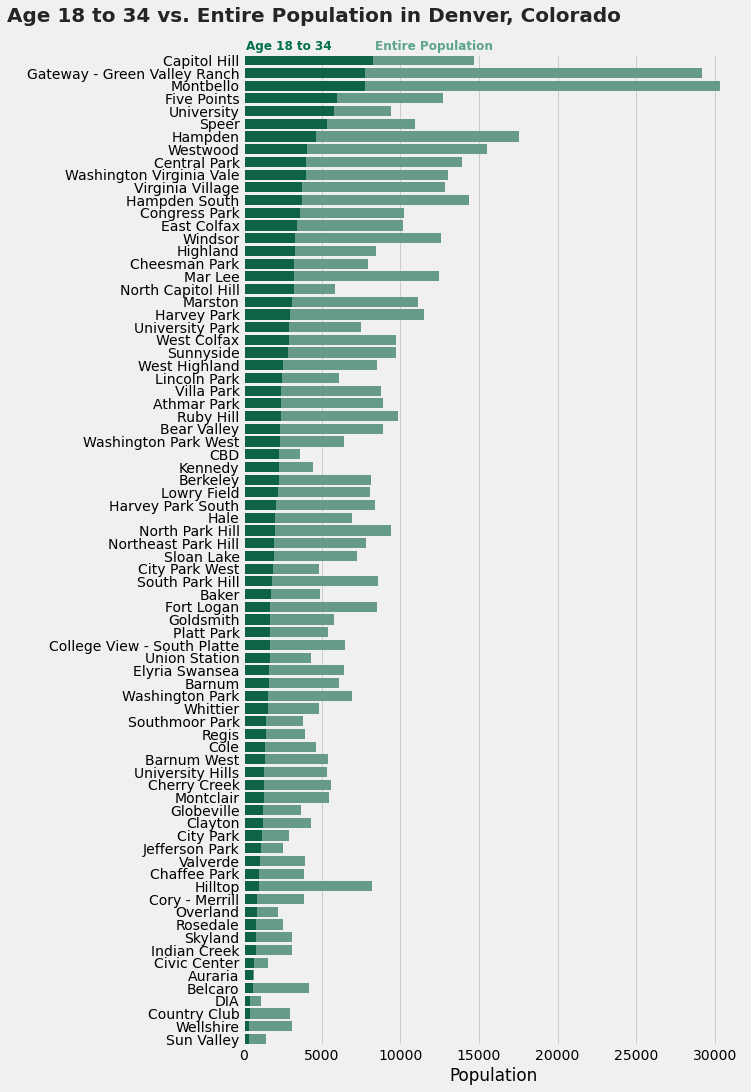

In [42]:
# Visualization 4
# Barplot to show the population of age 18 to 34 vs. the entire population

# Sort 'AGE_18_TO_34' by descending order
census_sorted_by_18_34 = census_sorted.sort_values('AGE_18_TO_34', ascending=False)

# Barplot for 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS' by Name
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 17))

sns.barplot(census_sorted_by_18_34['POPULATION_2010'], census_sorted_by_18_34['NBHD_NAME'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_18_34['AGE_18_TO_34'], census_sorted_by_18_34['NBHD_NAME'], ax=ax, color='#00704A')

#ax.axvline(avg_population, lw=1, ls='--', c='blue')
ax.set_xlabel("Population")
ax.set_ylabel("")
ax.text(-15000, -3, "Age 18 to 34 vs. Entire Population in Denver, Colorado", fontsize=20, weight='bold', color='#252525');
ax.text(200, -0.8, "Age 18 to 34", color='#00704A', fontsize=12, weight='bold')
ax.text(8400, -0.8, "Entire Population", color='#5CA48B', fontsize=12, weight='bold');

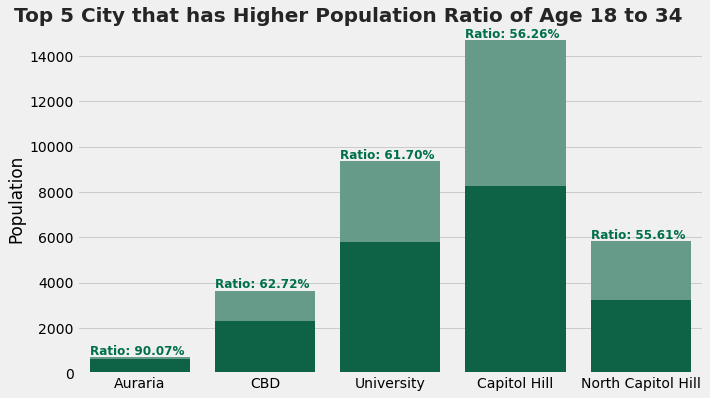

In [43]:
# Visualization 5: Ratio of 'AGE_18_TO_34' in 'POPULATION_2010'
# Barplot for 'ratio_AGE_18_TO_34' and 'AGE_18_TO_34' for top 20 city that have a higher ratio

# Calculate the ratio of 'AGE_18_TO_34' in the 'POPULATION_2010'
census['ratio_AGE_18_34'] = census['AGE_18_TO_34'] / census['POPULATION_2010'] * 100
census_sorted_by_ratio = census.sort_values('ratio_AGE_18_34', ascending=False)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Draw barplot
census_sorted_by_ratio_top_5 = census_sorted_by_ratio.head(5)
sns.barplot(census_sorted_by_ratio_top_5['NBHD_NAME'], census_sorted_by_ratio_top_5['POPULATION_2010'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_ratio_top_5['NBHD_NAME'], census_sorted_by_ratio_top_5['AGE_18_TO_34'], ax=ax, color='#00704A')

# Set axis lables and title
ax.set_xlabel("")
ax.set_ylabel("Population")
ax.text(-1., 15500, "Top 5 City that has Higher Population Ratio of Age 18 to 34", fontsize=20, weight='bold', color='#252525')

# Add a ratio of age 18 to 34 to the plot
for i in range(5):
    ax.text(i - 0.4, census_sorted_by_ratio_top_5.iloc[i, 2] + 100, 
            f"Ratio: {census_sorted_by_ratio_top_5.iloc[i, -1]:.2f}%", 
            color='#00704A', 
            fontsize=12, 
            weight='bold');

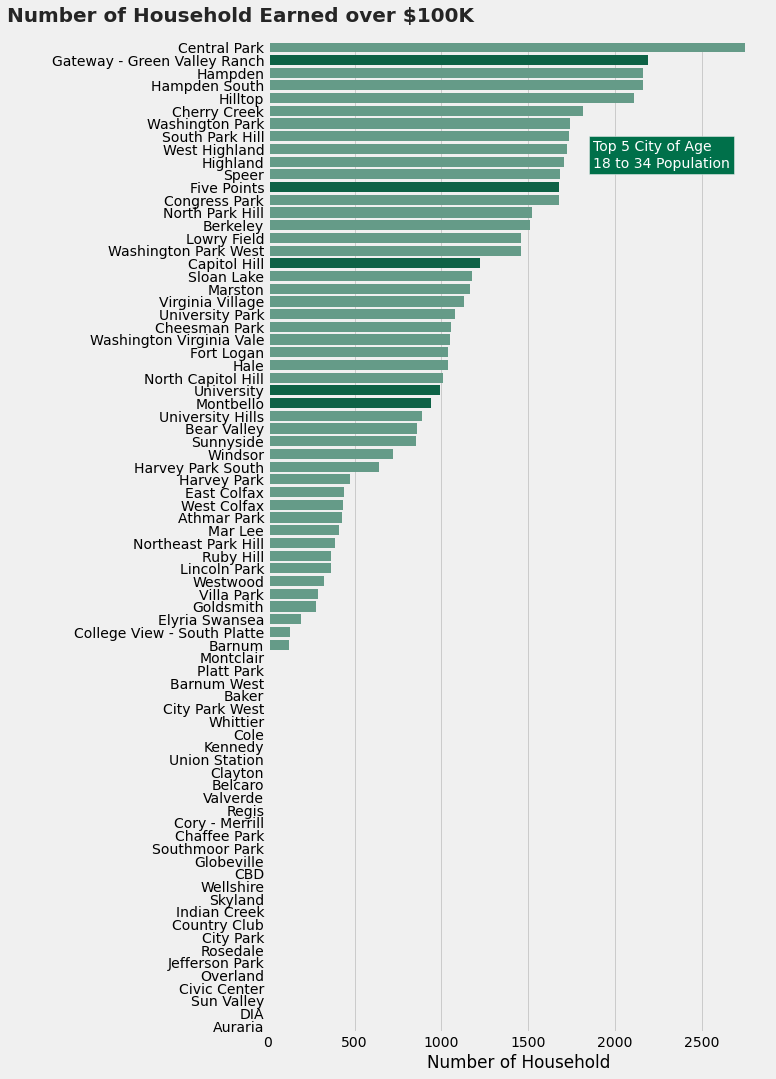

In [44]:
# Visualization 6: The number of 'NUM_HHLD_100K+'
# Barplot for the number of 'NUM_HHLD_100K+' by descending order

# Sort 'NUM_HHLD_100K+' by descending order
census_sorted_by_HHLD = census_sorted.sort_values('NUM_HHLD_100K+', ascending=False)

# Barplot 'NUM_HHLD_100K+'
plt.style.use('fivethirtyeight')
#sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 17))

# Highlight city/county that have higher population of age 18 to 34
custom_palette = {}
for city in census_sorted_by_HHLD['NBHD_NAME']:
    if city in outlier_city['NBHD_NAME'].to_list():
        custom_palette[city] = '#00704A'
    else:
        custom_palette[city] = '#5CA48B'

sns.barplot(census_sorted_by_HHLD['NUM_HHLD_100K+'], census_sorted_by_HHLD['NBHD_NAME'], palette=custom_palette)

# Add a title, xlabel, and ylabel
ax.set_xlabel("Number of Household")
ax.set_ylabel("")
ax.text(-1500, -2, "Number of Household Earned over $100K", fontsize=20, weight='bold', color='#252525')

# these are matplotlib.patch.Patch properties
props = dict(facecolor='#00704A')

# place a text box in upper left in axes coords
ax.text(0.65, 0.9, 'Top 5 City of Age\n18 to 34 Population', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props, color='white');

''

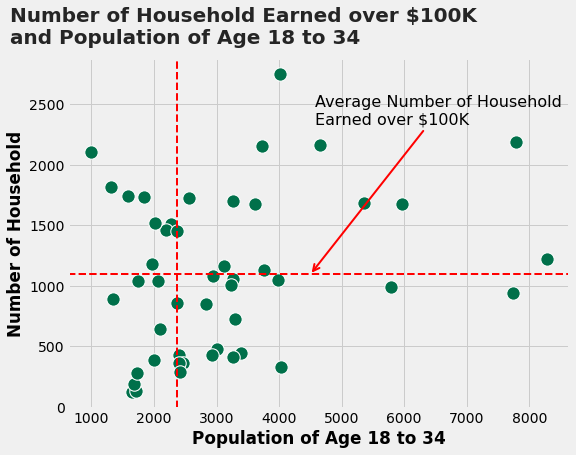

In [45]:
# Visualization 6: The number of 'NUM_HHLD_100K+' and 'AGE_18_TO_34'
# Scatterplot 'NUM_HHLD_100K+' and 'AGE_18_TO_34'

# The average 'NUM_HHLD_100K+' and 'AGE_18_TO_34'
avg_100K = census['NUM_HHLD_100K+'].mean()
avg_18_34 = census['AGE_18_TO_34'].mean()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(census['AGE_18_TO_34'], census['NUM_HHLD_100K+'], color='#00704A', s=180)

# Draw a virtical (avg_18_34) and horizontal (avg_100K) lines
ax.axvline(avg_18_34, color = 'red', lw=2, ls='--')
ax.axhline(avg_100K, color = 'red', lw=2, ls='--')

# Add a title, xlabel, and ylabel
ax.set_xlabel("Population of Age 18 to 34", weight='bold')
ax.set_ylabel("Number of Household", weight='bold')
ax.text(-300, 3000, "Number of Household Earned over $100K\nand Population of Age 18 to 34", 
        fontsize=20, weight='bold', color='#252525')
ax.annotate("Average Number of Household\nEarned over $100K", xy=(4500, avg_100K), xytext=(5, 150), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16);

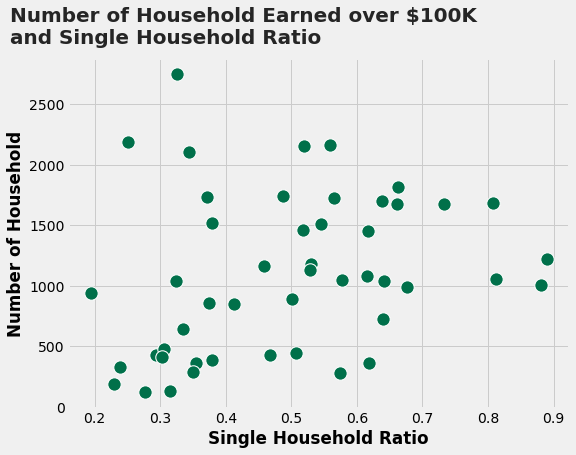

In [14]:
# The ratio of 'FAMILIES' in 'NUM_HOUSEHOLDS'
# Higher the ratio, the more family household than single individuals
# 'NUM_HHLD_100K+'
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 6))
census['single_ratio'] = (census['NUM_HOUSEHOLDS'] - census['FAMILIES']) / census['NUM_HOUSEHOLDS']
sns.scatterplot(census['single_ratio'], census['NUM_HHLD_100K+'], color='#00704A', s=180)

# Add a title, xlabel, and ylabel
ax.set_xlabel("Single Household Ratio", weight='bold')
ax.set_ylabel("Number of Household", weight='bold')
ax.text(0.07, 3000, "Number of Household Earned over $100K\nand Single Household Ratio", 
        fontsize=20, weight='bold', color='#252525');

## family oriented community 'NUM_HOUSEHOLDS' and 'FAMILIES'

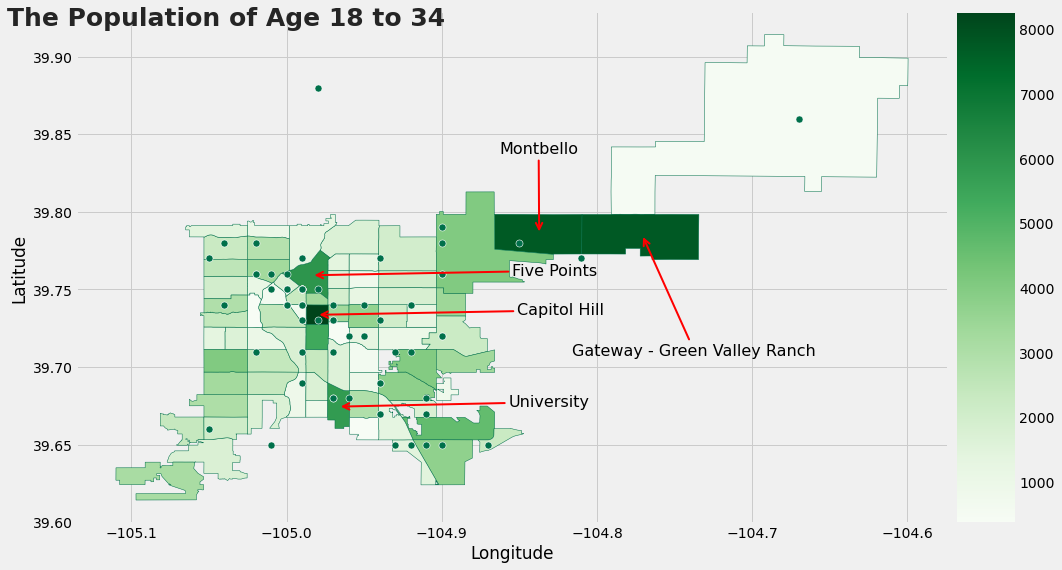

In [46]:
# Visualization 7: Choropleth Map for  and Sturbucks Locations 
# Draw Denver Colorado map

# Merge neighborhoods and census
census_neighborhoods = census.merge(neighborhoods)

# # Top 5 areas with the population of age 18 to 34
top5_18_34 = census_neighborhoods.sort_values('AGE_18_TO_34', ascending=False).head()

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Make the legend bar shorter
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad=0.1)

denver_map = gpd_census_neighborhoods.plot(column = 'AGE_18_TO_34', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')
gpd_census_neighborhoods.explore(tooltip='NBHD_NAME')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add title
ax.text(-105.18, 39.92, "The Population of Age 18 to 34", fontsize=25, weight='bold', color='#252525');

# Add city/county
# for city in census['NBHD_NAME']:
# Add the city/county name
# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(top5_18_34["NBHD_NAME"]):
        if label == "Gateway - Green Valley Ranch":
            h, v = -70, -120
        if label == "University":
            h, v = 170, 0
        if label ==  "Montbello":
            h, v = -40, 80  
        if label ==  "Five Points":
            h, v = 200, 0   
        if label ==  "Capitol Hill": 
            h, v = 200, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16) 


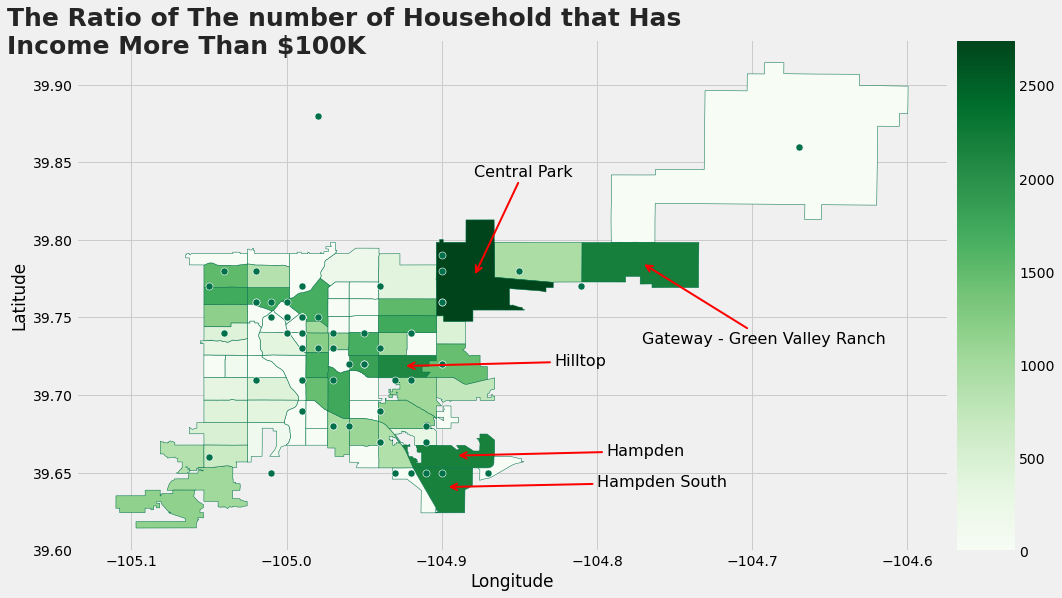

In [48]:
# Visualization 8: Choropleth Map for  and Sturbucks Locations 
# Draw Denver Colorado map

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

# Fill null with 0
census_neighborhoods['NUM_HHLD_100K+'].fillna(0, inplace=True)

# # Top 5 richest area
top5_rich_neighbors = census_neighborhoods.sort_values('NUM_HHLD_100K+', ascending=False).head()
top5_rich = top5_rich_neighbors['NBHD_NAME']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Make the legend bar shorter
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad=0.1)

# Draw the map and legend
denver_map = gpd_census_neighborhoods.plot(column = 'NUM_HHLD_100K+', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add the title
ax.text(-105.18, 39.92, "The Ratio of The number of Household that Has\nIncome More Than $100K", fontsize=25, weight='bold', color='#252525')

# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(top5_rich):
        if label == "Central Park":
            h, v = 0, 100
        if label == "Gateway - Green Valley Ranch":
            h, v = 0, -80
        if label ==  "Hampden":
            h, v = 150, 0  
        if label ==  "Hilltop":
            h, v = 150, 0   
        if label ==  "Hampden South": 
            h, v = 150, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16)

In [1]:
# Top 5 richest area
census['NUM_HHLD_100K+_ratio'] = census['NUM_HHLD_100K+'] / census['NUM_HOUSEHOLDS'] * 100

# Top 5 richest area
top5_rich_ratio = census.sort_values('NUM_HHLD_100K+_ratio', ascending=False).head()
top5_rich_ratio = top5_rich_ratio['NBHD_NAME']

NameError: name 'census' is not defined

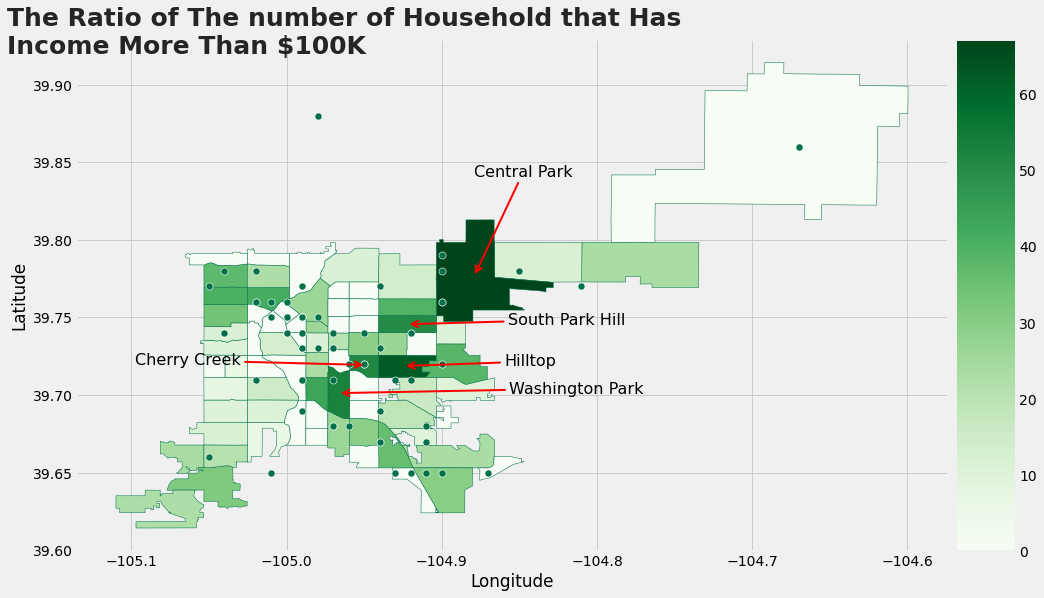

In [ ]:
# Visualization 2: Choropleth Map for  and Sturbucks Locations 
# Draw Denver Colorado map

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

# Fill null with 0
census_neighborhoods['NUM_HHLD_100K+'].fillna(0, inplace=True)
census_neighborhoods['NUM_HHLD_100K+_ratio'] = census_neighborhoods['NUM_HHLD_100K+'] / census_neighborhoods['NUM_HOUSEHOLDS'] * 100

# Top 5 richest area
top5_rich_neighbors = census_neighborhoods.sort_values('NUM_HHLD_100K+_ratio', ascending=False).head()
top5_rich = top5_rich_neighbors['NBHD_NAME']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Make the legend bar shorter
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad=0.1)

# Draw the map and legend
denver_map = gpd_census_neighborhoods.plot(column = 'NUM_HHLD_100K+_ratio', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add the title
ax.text(-105.18, 39.92, "The Ratio of The number of Household that Has\nIncome More Than $100K", fontsize=25, weight='bold', color='#252525')

# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(top5_rich):
        if label == "Central Park":
            h, v = 0, 100
        if label == "South Park Hill":
            h, v = 100, 0
        if label ==  "Cherry Creek":
            h, v = -230, 0  
        if label ==  "Hilltop":
            h, v = 100, 0   
        if label ==  "Washington Park": 
            h, v = 170, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16)

### Note: 

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!